# Experiments and Explorations

July 23, 2025

## Purpose

The purpose of this notebook is to investigate the following issues:
- adding case rate (case count / pop_per_100k)
- linear interpolating population
- adding case rate WITH linear interpolation of population

All of these will see how the model predictions change

### Set Up

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import sys 
import os 

sys.path.append(os.path.abspath('..'))

from data_loader import combine_vf_fire_pop_data
from main import main
from model_plots import model_comparison_subplots_by_count

In [2]:
# file paths
fire_data_path       = "../../data/CAL_FIRE_Wildland_PublicReport_2000to2018.csv"
vf_data_path         = "../../data/coccidioidomycosis_m2000_2015_v0.1.csv"
pop1_data_path       = "../../data/cali_county_pop_2000_2010.csv" 
pop2_data_path       = "../../data/cali_county_pop_2010_2020.csv"
start_year           = "2006"
end_year             = "2015"
county_name          = "Fresno"

# grab the initial dataframe with the case count, fire count, and population
df_initial = combine_vf_fire_pop_data(pop1_data_path, pop2_data_path, vf_data_path, fire_data_path,
                                      county_name)

/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fire_monthly = fire_county.resample("M").size()
/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range("2006-01-01", "2018-12-31", freq="M")


In [3]:
df_initial

,Fire Incident Count,VF Case Count,Population
Month,,,
2006-01-01,0,52,883862
2006-02-01,0,54,883862
2006-03-01,0,35,883862
2006-04-01,0,79,883862
2006-05-01,0,36,883862
...,...,...,...
2015-08-01,47,25,972906
2015-09-01,37,27,972906
2015-10-01,16,52,972906


In [4]:
df_modified = df_initial.copy()
df_modified['VF Case Rates'] = df_modified['VF Case Count']/(df_modified['Population']/100000)

In [5]:
df_modified

,Fire Incident Count,VF Case Count,Population,VF Case Rates
Month,,,,
2006-01-01,0,52,883862,5.883271
2006-02-01,0,54,883862,6.109551
2006-03-01,0,35,883862,3.959894
2006-04-01,0,79,883862,8.938047
2006-05-01,0,36,883862,4.073034
...,...,...,...,...
2015-08-01,47,25,972906,2.569621
2015-09-01,37,27,972906,2.775191
2015-10-01,16,52,972906,5.344812


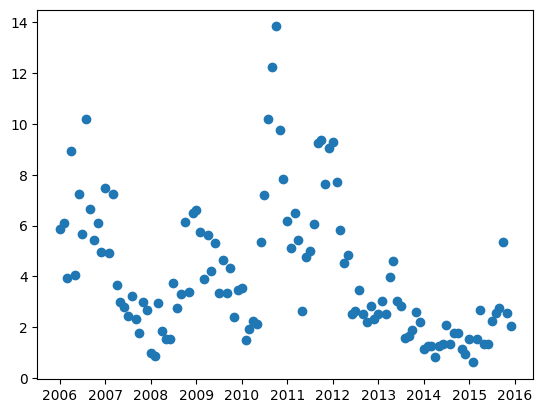

In [24]:
plt.scatter(df_modified.index, df_modified['VF Case Rates'], marker='o')
plt.show()

In [6]:
X_all, y_all = [], []

In [8]:
np.array(df_modified)

array([[0.00000000e+00, 5.20000000e+01, 8.83862000e+05, 5.88327137e+00],
       [0.00000000e+00, 5.40000000e+01, 8.83862000e+05, 6.10955104e+00],
       [0.00000000e+00, 3.50000000e+01, 8.83862000e+05, 3.95989419e+00],
       [0.00000000e+00, 7.90000000e+01, 8.83862000e+05, 8.93804689e+00],
       [0.00000000e+00, 3.60000000e+01, 8.83862000e+05, 4.07303403e+00],
       [0.00000000e+00, 6.40000000e+01, 8.83862000e+05, 7.24094938e+00],
       [0.00000000e+00, 5.00000000e+01, 8.83862000e+05, 5.65699170e+00],
       [0.00000000e+00, 9.00000000e+01, 8.83862000e+05, 1.01825851e+01],
       [0.00000000e+00, 5.90000000e+01, 8.83862000e+05, 6.67525021e+00],
       [3.30000000e+01, 4.80000000e+01, 8.83862000e+05, 5.43071203e+00],
       [2.30000000e+01, 5.40000000e+01, 8.83862000e+05, 6.10955104e+00],
       [2.00000000e+01, 4.40000000e+01, 8.83862000e+05, 4.97815270e+00],
       [1.90000000e+01, 6.70000000e+01, 8.95933000e+05, 7.47823777e+00],
       [3.00000000e+00, 4.40000000e+01, 8.95933000e

In [9]:
df_initial

,Fire Incident Count,VF Case Count,Population
Month,,,
2006-01-01,0,52,883862
2006-02-01,0,54,883862
2006-03-01,0,35,883862
2006-04-01,0,79,883862
2006-05-01,0,36,883862
...,...,...,...
2015-08-01,47,25,972906
2015-09-01,37,27,972906
2015-10-01,16,52,972906


In [10]:
df_mod2 = df_initial.copy()

In [11]:
df_mod2['VF Case Count'] = df_mod2['VF Case Count']/(df_mod2['Population']/100000)

In [12]:
df_mod2

,Fire Incident Count,VF Case Count,Population
Month,,,
2006-01-01,0,5.883271,883862
2006-02-01,0,6.109551,883862
2006-03-01,0,3.959894,883862
2006-04-01,0,8.938047,883862
2006-05-01,0,4.073034,883862
...,...,...,...
2015-08-01,47,2.569621,972906
2015-09-01,37,2.775191,972906
2015-10-01,16,5.344812,972906


In [13]:
df_mod2.rename(columns = {'VF Case Count' : 'VF Case Rate'})

,Fire Incident Count,VF Case Rate,Population
Month,,,
2006-01-01,0,5.883271,883862
2006-02-01,0,6.109551,883862
2006-03-01,0,3.959894,883862
2006-04-01,0,8.938047,883862
2006-05-01,0,4.073034,883862
...,...,...,...
2015-08-01,47,2.569621,972906
2015-09-01,37,2.775191,972906
2015-10-01,16,5.344812,972906


In [18]:
df = df_mod2.copy()
df = df.rename(columns={'VF Case Count' : 'VF Case Rate'})

In [23]:
def convert_case_count_to_rate(df):
  df['VF Case Count'] = (df['VF Case Count'] / df['Population']) * 100000
  df = df.rename(columns={'VF Case Count' : 'VF Case Rate'})
  return df

/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fire_monthly = fire_county.resample("M").size()
/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range("2006-01-01", "2018-12-31", freq="M")


Epoch 1/300 - Training Loss 0.2609, Testing Loss 0.0856
Epoch 11/300 - Training Loss 0.2041, Testing Loss 0.2483
Epoch 21/300 - Training Loss 0.1961, Testing Loss 0.1652
Epoch 31/300 - Training Loss 0.1899, Testing Loss 0.1777
Epoch 41/300 - Training Loss 0.1809, Testing Loss 0.1380
Epoch 51/300 - Training Loss 0.1650, Testing Loss 0.0838
Epoch 61/300 - Training Loss 0.1553, Testing Loss 0.0597
Epoch 71/300 - Training Loss 0.1462, Testing Loss 0.0764
Epoch 81/300 - Training Loss 0.1362, Testing Loss 0.0693
Epoch 91/300 - Training Loss 0.1270, Testing Loss 0.0761
Epoch 101/300 - Training Loss 0.1165, Testing Loss 0.0791
Epoch 111/300 - Training Loss 0.1160, Testing Loss 0.0766
Epoch 121/300 - Training Loss 0.1197, Testing Loss 0.0693
Epoch 131/300 - Training Loss 0.1114, Testing Loss 0.0762
Epoch 141/300 - Training Loss 0.1090, Testing Loss 0.0752
Epoch 151/300 - Training Loss 0.1074, Testing Loss 0.0762
Epoch 161/300 - Training Loss 0.1052, Testing Loss 0.0843
Epoch 171/300 - Training 

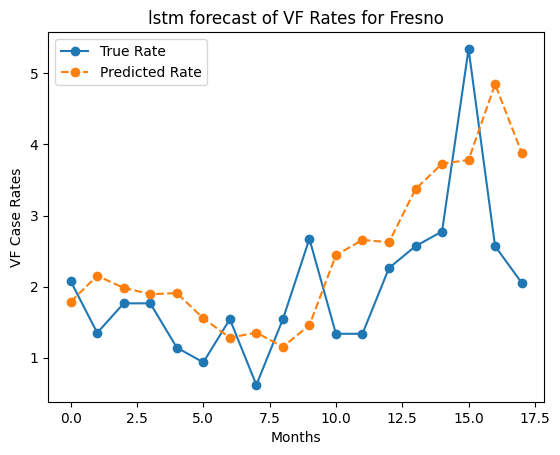

In [33]:
# model setup 
from models import LSTM, TransformerModel
from transformer_modules.attention import MultiHeadAttention
from data_utils import prep_data
from loss_functions import RMSELoss
import torch.optim as optim 
from trainer import Trainer

county_name        = "Fresno"
split_frac           = .85
lookback             = 6
hidden_size          = 64
num_layers           = 2
dropout              = 0.2
learning_rate        = 0.001
epochs             = 300
weight_decay         = 1e-5
model_flag           = "lstm"

if model_flag == "transformer":
  d_model         = 32
  nheads          = 2
  dim_feedforward = 64
  num_layers      = 1
  dropout         = 0.2

source_column_labels = ["Fire Incident Count", "VF Case Rate", "Population"]
input_size = len(source_column_labels)

df = combine_vf_fire_pop_data(pop1_path=pop1_data_path, pop2_path=pop2_data_path, vf_cases_path=vf_data_path,
                              wildfire_path=fire_data_path, county=county_name, start_year=start_year,
                              end_year=end_year)

df = convert_case_count_to_rate(df)

X_train, y_train, X_test, y_test, scaler = prep_data(df, source_column_labels, 
                                                        split_frac, lookback, b_scaler=True)

if model_flag == "lstm":
  model     = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout)
elif model_flag == "transformer":
  model = TransformerModel(input_size= input_size, d_model = d_model, nhead= nheads, num_layers = num_layers,
                          dim_feedforward= dim_feedforward, dropout=dropout, attention_impl=MultiHeadAttention)
else:
  raise NotImplementedError("Missing Arch")

criterion = RMSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=weight_decay)  

trainer = Trainer(model = model, criterion = criterion, optimizer = optimizer, scaler = scaler)
trainer.train(X_train, y_train, X_test, y_test, epochs)

y_pred, y_true = trainer.evaluate(X_test, y_test)

plt.plot(y_true, label = "True Rate", linestyle="-", marker='o')
plt.plot(y_pred, label = 'Predicted Rate', linestyle = '--', marker = 'o')
plt.title(f"{model_flag} forecast of VF Rates for {county_name}")
plt.xlabel("Months")
plt.ylabel("VF Case Rates")
plt.legend()

plt.show()


### Observations

There seems to be a little bit more error introduced when changing to case rates instead of just case count. Need to investigate this more